In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier 
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('auto_insurance_csv.csv')
df = data.copy()


display(df.head())

print("\n")
print("Dataframe shape : ",df.shape)
print("\n")

display(df.info())

print("\n")

print("fraud_reported count: ")
print("\n")

print(df.fraud_reported.value_counts())

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,328,48.0,521585,2014-10-17,OH,250/500,1000,1406.91,0.0,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,1,228,42.0,342868,2006-06-27,IN,250/500,2000,1197.22,5000000.0,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,2,134,29.0,687698,2000-09-06,OH,NaN,2000,1413.14,5000000.0,...,NaN,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,3,256,41.0,227811,1990-05-25,IL,NaN,2000,1415.74,6000000.0,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,4,228,44.0,367455,2014-06-06,IL,NaN,1000,1583.91,6000000.0,...,NaN,6500,1300,650,4550,Accura,RSX,2009,N,NaN




Dataframe shape :  (1000, 41)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          865 non-null    float64
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   127 non-null    object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               802 non-null    float64
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null 

None



fraud_reported count: 


N    753
Y    247
Name: fraud_reported, dtype: int64


In [3]:
df.describe()


,Unnamed: 0,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,865.000000,1000.000000,1000.000000,1000.000000,8.020000e+02,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,499.500000,203.954000,38.812717,546238.648000,1136.000000,1256.406150,1.103491e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,288.819436,115.113174,9.123361,257063.005276,611.864673,244.167395,2.299218e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,249.750000,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,499.500000,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,749.250000,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,999.000000,479.000000,64.000000,999435.000000,2000.000000,2047.590000,9.000000e+06,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [5]:
# fraud_reported kolonu ile gruplayıp ilgili yaşların ortalamasıyla boş olan değerlerin doldurulması: 

df["age"] = df.groupby(['fraud_reported'])['age'].apply(lambda x: round(x.fillna(x.mean())))

bin_labels_age = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels_age, include_lowest = True)

# policy_csl değişkenindeki boş alanlar "missing" string'i ile doldurulması :

df['policy_csl'] = df.policy_csl.fillna("MISSING")

# umbrella_limit değişkenindeki 0.0 olan alanlar "NO" , 
# sıfırdan farklı sayısal bir veri içeren alanlara "YES" ,
# son olarak eksik verilerin "missing" string'i ile doldurulması : 

df['umbrella_limit'] = df.umbrella_limit.fillna("MISSING")
df['umbrella_limit'] = df['umbrella_limit'].replace(0.0, 'NO')

for i in df['umbrella_limit'].unique():
    if (i != 'MISSING') & (i != 'NO'):
        df['umbrella_limit'] = df['umbrella_limit'].replace(i, 'YES')
        
# police_report_available değişkenindeki boş satırlar "missing" string'i ile doldurulması :

df['police_report_available'] = df.police_report_available.fillna("MISSING")

# policy_bind_date ve incident_date değişkenlerinin datetime'a çevrilmesi, 
# ilgili değişkenlerin birbirlerinden çıkartılarak "claim_day_of_policy" adında yeni bir kolon oluşturulması: 

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days

# insured_hobbies kolonunda "chess" ve "cross-fit" dışındaki veriler "other" kategorisine çekilmesi : 

hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')
    
# kazanın yaşandığı yer ile poliçenin düzenlendiği yer aynı mıdır kontrolünün yapılması ve "location_check" adlı bir değişken oluşturulması : 
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
    

# analizlerin yapıldığı yaklaşık tarih olarak "2016" baz yılı alınarak araç yaşı("vehicle_age") değişkeninin oluşturulması : 

df['vehicle_age'] = 2016 - df['auto_year']

In [6]:
# gruplama işlemleri : 

bins_papg = list(np.linspace(0,2500, 6, dtype = int))
bin_labels_papg = ['very low', 'low', 'medium', 'high', 'very high']
df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins_papg, labels=bin_labels_papg)


bins_macg = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels_macg = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']
df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = bins_macg, labels = bin_labels_macg, include_lowest= True)

bins_pdg = list(np.linspace(0,2000, 5, dtype = int))
bin_labels_pdg = ['0-500', '501-1000', '1001-1500', '1501-2000']
df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins_pdg, labels = bin_labels_pdg)

# hedef değişkenin 0 ve 1 olarak dönüştürülmesi : 

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

# gereksiz kolonların veri setimizden çıkartılması : 

df = df.drop(['_c39','Unnamed: 0','age','policy_bind_date','incident_date',
              'policy_number','incident_location','auto_model','insured_zip',"auto_year","vehicle_age"], axis = 1)

In [7]:
df.shape 

(1000, 37)

In [8]:
df.isnull().sum()

months_as_customer              0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make     

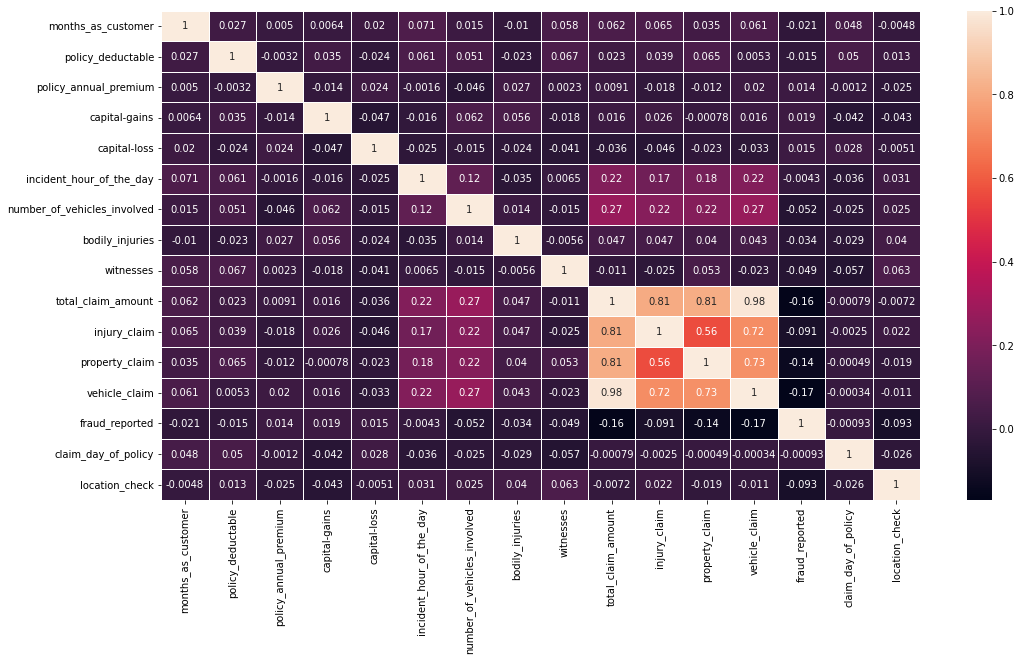

In [9]:
corr = df.corr()
plt.figure(figsize = (17, 9))
sns.heatmap(data = corr, annot = True, linewidth = 1)
plt.show()

####  Korelasyon matrisinden,  `vehicle claim` , `total_claim_amount` , `property_claim` ve `injury_claim` arasında yüksek bir korelasyon olduğunu görmekteyiz. 
#### Çünkü total_claim_amount `vehicle claim`,`property_claim` ve `injury_claim` sütunlarının toplamını vermektedir.

#### total_claim_amount bilgilerini elde edip geriye kalan 3 değişken veri setimizden çıkarılacaktır. 

In [10]:
df = df.drop(['vehicle_claim', 'property_claim', 'injury_claim'], axis = 1)


In [11]:
# encode edilecek kolonların "columns_to_encode" değişkenine atanması :

cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']

for col in cat_cols:
    df[col] = df[col].astype('object')

columns_to_encode = []
for col in df.columns:
    if df[col].dtype == 'object':
        columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'age_group',
 'location_check',
 'policy_annual_premium_groups',
 'months_as_customer_groups',
 'policy_deductable_group']

In [12]:
# hedef değişken ve geriye kalan bağımsız değişkenleri ayırma : 

y = df.fraud_reported
X = df.drop('fraud_reported', axis=1)

## Veri Setinin Test ve Eğitim Seti Olarak Ayrıştırılması

Bu aşamada uygulanacak işlemlerden önce veri seti TEST ve EĞİTİM seti olarak ikiye ayrılmalıdır. Gerçek bir case çalışmasında bu şekilde ilerlemek daha doğru sonuçlar üretmenizi sağlar. Veri seti ayrıştırılmadan yapılan işlemler "data leakage" olarak bilinen sorunlara yol açabilir.

In [13]:
# veri setinin test-train seti olarak ikiye ayrılması :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

display(X_train.shape)
display(X_test.shape)

(800, 33)

(200, 33)

In [15]:
# train test ayrımından sonra belirlenen kolonlara one hot encode uyguluyoruz :

X_train_encode = pd.get_dummies(X_train, columns = columns_to_encode)
X_test_encode = pd.get_dummies(X_test, columns = columns_to_encode)

print(X_train_encode.shape)
print(X_test_encode.shape)

(800, 135)
(200, 133)


In [16]:
# X_test_encode ve X_train_encode değişkenlerindeki encode işleminden sonra yaşanan eşitsizliği ortadan kaldırmak için "reindex" kullandım : 

X_test_encode = X_test_encode.reindex(columns = X_test_encode.columns, fill_value=0)

In [17]:
# Tekrar kontrol edelim :

print(X_train_encode.shape)
print(X_test_encode.shape)

(800, 135)
(200, 133)


## Scale (Ölçeklendirme) Aşaması 

In [18]:
sc = StandardScaler()
X_train_encode_sc = sc.fit_transform(X_train_encode)
X_test_encode_sc = sc.fit_transform(X_test_encode)

## SMOTE Aşaması

Burda önemli olan nokta, oversampling işlemini sadece eğitim verileri üzerinde yapmak.

In [19]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_over, y_train_over = sm.fit_resample(X_train_encode_sc, y_train)

/home/merve/notebook/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

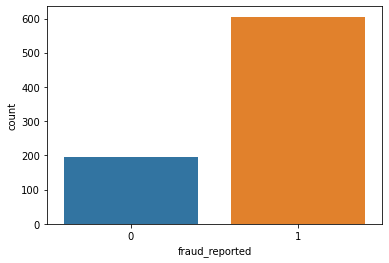

In [20]:
# oversampling öncesi y_train: 

chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

/home/merve/notebook/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

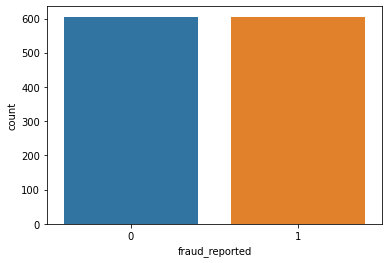

In [21]:
# smote sonrası y_train: 

chck2 = pd.DataFrame()
chck2['fraud_reported'] = y_train_over

sns.countplot(chck2['fraud_reported'])

## Modelleme Aşaması 

Evet artık hazırız.. 


Şimdi oversampling uyguladığımız değişkenler ile train_test_split fonksiyonumuzu besleyelim ve model denemelerimize başlayalım :

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_train_over, y_train_over, test_size = 0.2, random_state = 1)

### Logistic Regression

Linear Regression'dan sonra modellerin atası sayılabilecek Logistic Regression ile başlayalım :

In [23]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_test)
score = lr.score(X_test, y_test)

print("Training Accuracy: ", lr.score(X_train, y_train))
print('Testing Accuarcy: ', round(lr.score(X_test, y_test),3))

Training Accuracy:  0.9245867768595041
Testing Accuarcy:  0.847


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       126
           1       0.86      0.81      0.84       116

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



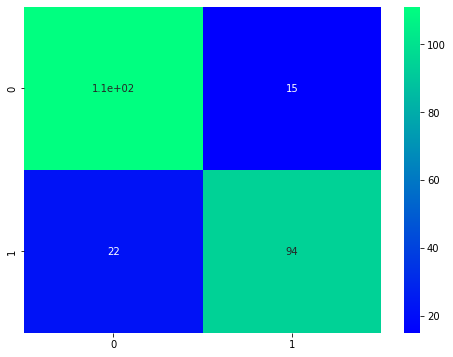

In [24]:
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)

# confusion matrix
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

### Decision Tree

In [25]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)
score = dtc.score(X_test, y_test)

print("Training Accuracy: ", dtc.score(X_train, y_train))
print('Testing Accuarcy: ', round(dtc.score(X_test, y_test),3))

Training Accuracy:  1.0
Testing Accuarcy:  0.855


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.86      0.83      0.85       116

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



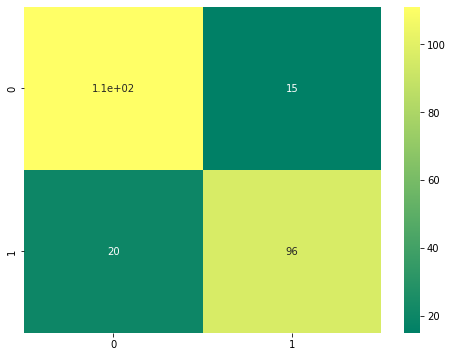

In [26]:
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)

# confusion matrix
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot = True, cmap = 'summer')
plt.show()

## Random Forest


In [27]:
rfc = RandomForestClassifier(n_estimators=25, random_state=12)

rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

print("Training Accuracy: ", rfc.score(X_train, y_train))
print('Testing Accuarcy: ', round(rfc.score(X_test, y_test),3))

Training Accuracy:  1.0
Testing Accuarcy:  0.851


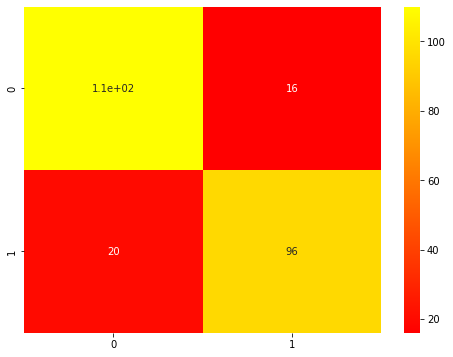

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       126
           1       0.86      0.83      0.84       116

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [28]:
# confusion matrix
cm = confusion_matrix(y_test, preds)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot = True, cmap = 'autumn')
plt.show()

# classification report
cr = classification_report(y_test, preds)
print(cr)

## SVC

In [29]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

preds = svc.predict(X_test)
score = svc.score(X_test, y_test)

print("Training Accuracy: ", round(svc.score(X_train, y_train),3))
print('Testing Accuarcy: ', round(svc.score(X_test, y_test),3))

Training Accuracy:  0.93
Testing Accuarcy:  0.86


Training Accuracy:  0.9297520661157025
Testing Accuarcy:  0.859504132231405


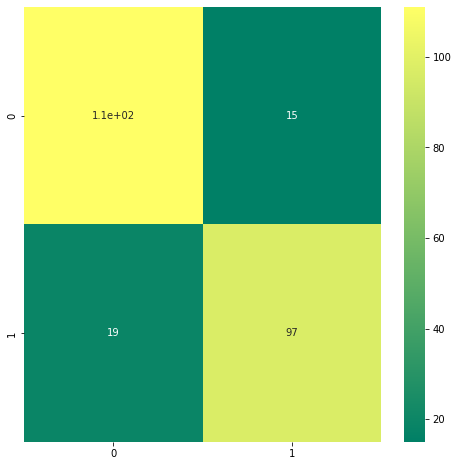

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       126
           1       0.87      0.84      0.85       116

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [30]:
print("Training Accuracy: ", svc.score(X_train, y_train))
print('Testing Accuarcy: ', svc.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, preds)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'summer')
plt.show()

# classification report
cr = classification_report(y_test, preds)
print(cr)

In [31]:
# Ensemble Classifier
model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(X_train, y_train)
y_pred_ef = model1.predict(X_test)


Training Accuracy:  0.9400826446280992
Testing Accuarcy:  0.8512396694214877


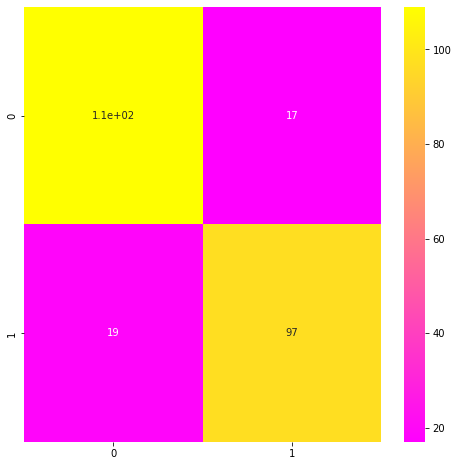

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       126
           1       0.85      0.84      0.84       116

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [32]:
print("Training Accuracy: ", model1.score(X_train, y_train))
print('Testing Accuarcy: ', model1.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

# classification report
cr = classification_report(y_test, y_pred_ef)
print(cr)

## Hiperparametre Optimizasyonu Aşaması (Hyperparameter Tuning)

Makine öğreniminde hiperparametre optimizasyonu veya ayarlaması, bir öğrenme algoritması için bir dizi optimal hiperparametre seçme problemidir. 

Hiperparametre optimizasyonu sonucunda RandomForestClassifier ile oluşturulan "rf2" modelimizi iyileştirebildik. Bu aşamadan sonra farklı modeller üzerinde tuning işlemleri yaparak sonuçlarımızı iyileştirmek için denemeler yapabiliriz. Eğer sonuçlar beklediğimiz gibi olmuyorsa veri hazırlama aşamasına geri dönüp veri üzerindeki çalışmalarımızı tekrar gözden geçirip gerekiyorsa değiştirebiliriz.  

In [33]:
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}


In [34]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 17, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [300, 650, 1000]}


In [35]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': False}

Training Accuracy:  1.0
Testing Accuarcy:  0.8760330578512396


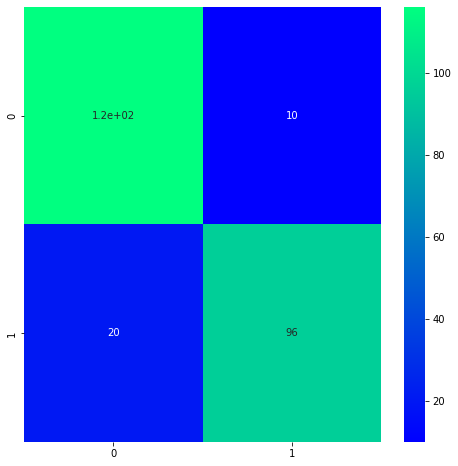

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       126
           1       0.91      0.83      0.86       116

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.88       242
weighted avg       0.88      0.88      0.88       242



In [37]:
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
                            ,max_depth=17,bootstrap='False')
rf2.fit(X_train, y_train)

preds_ = rf2.predict(X_test)
score_ = rf2.score(X_test, y_test)

print("Training Accuracy: ", rf2.score(X_train, y_train))
print('Testing Accuarcy: ', rf2.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, preds_)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test, preds_)
print(cr)